In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

download the data from the url: https://www.kaggle.com/datamunge/sign-language-mnist/home

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        reader=csv.reader(training_file,delimiter=',')
        imgs=[]
        labels=[]
        
        next(reader,None)
        
        for row in reader:
            label=row[0]
            data=row[1:]
            img=np.array(data).reshape(28,28)
            
            imgs.append(img)
            labels.append(label)
        
        images=np.array(imgs).astype(float)
        labels=np.array(labels).astype(float)
    
    return images,labels

In [3]:
training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

In [4]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


# step dealing with model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Configure generators
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(
    train_gen,
    epochs=20,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels)
    

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/20
429/429 [==============================] - 41s 95ms/step - loss: 2.7817 - acc: 0.1586 - val_loss: 2.0560 - val_acc: 0.3190
Epoch 2/20
429/429 [==============================] - 25s 58ms/step - loss: 2.0923 - acc: 0.3408 - val_loss: 1.3699 - val_acc: 0.5158
Epoch 3/20
429/429 [==============================] - 54s 126ms/step - loss: 1.7138 - acc: 0.4518 - val_loss: 1.1068 - val_acc: 0.6061
Epoch 4/20
429/429 [==============================] - 39s 92ms/step - loss: 1.4533 - acc: 0.5281 - val_loss: 0.9980 - val_acc: 0.6397
Epoch 5/20
429/429 [==============================] - 31s 71ms/step - loss: 1.2668 - acc: 0.5881 - val_loss: 0.8442 - val_acc: 0.6917
Epoch 6/20
429/429 [==============================] - 26s 61ms/step - loss: 1.1014 - acc: 0.6392 - val_loss: 0.6721 - val_acc: 0.7639
Epoch 7/20
429/429 [==============================] - 26s 61ms/step - loss: 0.9973 - acc: 0.6716 - val_loss: 0.6307 - val_a

[5.233548095238918, 0.6728946]

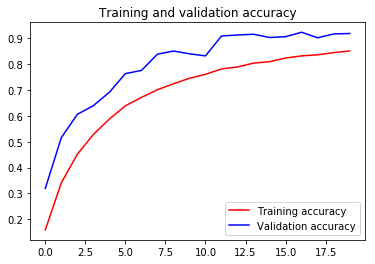

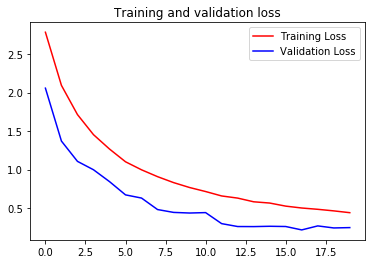

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()